In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = []

f=open("article_data_v4.txt", "r", encoding="utf-8")
for line in f:
    line = line.rstrip("\n") #\n was causeing problem in spliting

    parts = line.split("@", 2) # split using first 2 '@'

    # print(parts)

    if len(parts) == 3:
        data.append(parts)
    else:
        print("BAD LINE →", line)  # This will show exactly which line fails



In [3]:
df = pd.DataFrame(data, columns=["index", "title", "article"])
df

,index,title,article
0,1,Traffic resumes on Ramban–Banihal highway; LMV...,Jammu:The National Highways Authority of India...
1,2,"Ramban Cloudburst: 3 Dead, Several Missing As ...","Jammu, August 30: At least three people have l..."
2,3,J-K monsoon disaster: Three killed as cloudbur...,At least three people were killed after a clou...
3,4,"Cloudburst hits J&K: 3 killed, 4 missing in Ra...",A cloudburst in Jammu and Kashmir's Ramban reg...
4,5,"11 dead in J-K as cloudburst hits Ramban, land...",Eleven people lost their lives in two separate...
...,...,...,...
9089,9090,US Authorities Probe Flight Overshooting Runwa...,US authorities are investigating an incident w...
9090,9091,,
9091,9092,Life-saving runway tech saves dozens in Virgin...,A United flight from Dulles faced a close call...
9092,9093,No injuries reported after incident at Roanoke...,Airport officials say multiple flights Thursda...


In [4]:
df2=pd.read_csv("scrape_main_data.txt",sep='@', encoding='utf-8')
df2['index']=df2['index']+1
df2

,index,Distributer,bias,article_url
0,1,The Siasat Daily,Left,https://www.siasat.com/traffic-resumes-on-ramb...
1,2,Latestly,Right,https://www.latestly.com/india/news/ramban-clo...
2,3,Financial Express,Right,https://www.financialexpress.com/india-news/th...
3,4,India Today,Right,https://www.indiatoday.in/india/video/jammu-an...
4,5,Tribune India,Right,https://www.tribuneindia.com/news/j-k/3-dead-t...
...,...,...,...,...
9089,9090,Bloomberg,Left,https://www.bloomberg.com/news/articles/2025-0...
9090,9091,Temple Daily Telegram,Center,https://www.tdtnews.com/news/nation_world/arti...
9091,9092,Fox5 DC,Center,https://www.fox5dc.com/news/plane-overshot-lan...
9092,9093,WSLS,Center,https://www.wsls.com/news/local/2025/09/25/off...


In [5]:
#merging the two df
df=pd.concat([df,df2], axis=1)

df = df.drop(columns=["index"])

df

,title,article,Distributer,bias,article_url
0,Traffic resumes on Ramban–Banihal highway; LMV...,Jammu:The National Highways Authority of India...,The Siasat Daily,Left,https://www.siasat.com/traffic-resumes-on-ramb...
1,"Ramban Cloudburst: 3 Dead, Several Missing As ...","Jammu, August 30: At least three people have l...",Latestly,Right,https://www.latestly.com/india/news/ramban-clo...
2,J-K monsoon disaster: Three killed as cloudbur...,At least three people were killed after a clou...,Financial Express,Right,https://www.financialexpress.com/india-news/th...
3,"Cloudburst hits J&K: 3 killed, 4 missing in Ra...",A cloudburst in Jammu and Kashmir's Ramban reg...,India Today,Right,https://www.indiatoday.in/india/video/jammu-an...
4,"11 dead in J-K as cloudburst hits Ramban, land...",Eleven people lost their lives in two separate...,Tribune India,Right,https://www.tribuneindia.com/news/j-k/3-dead-t...
...,...,...,...,...,...
9089,US Authorities Probe Flight Overshooting Runwa...,US authorities are investigating an incident w...,Bloomberg,Left,https://www.bloomberg.com/news/articles/2025-0...
9090,,,Temple Daily Telegram,Center,https://www.tdtnews.com/news/nation_world/arti...
9091,Life-saving runway tech saves dozens in Virgin...,A United flight from Dulles faced a close call...,Fox5 DC,Center,https://www.fox5dc.com/news/plane-overshot-lan...
9092,No injuries reported after incident at Roanoke...,Airport officials say multiple flights Thursda...,WSLS,Center,https://www.wsls.com/news/local/2025/09/25/off...


<Axes: >

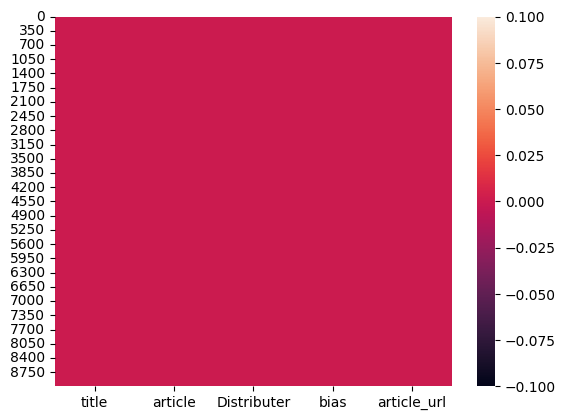

In [6]:
sns.heatmap(df.isna())

C:\Users\2077a\AppData\Local\Temp\ipykernel_13056\3634116991.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['article'].replace('', np.nan, inplace=True)
C:\Users\2077a\AppData\Local\Temp\ipykernel_13056\3634116991.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

<Axes: >

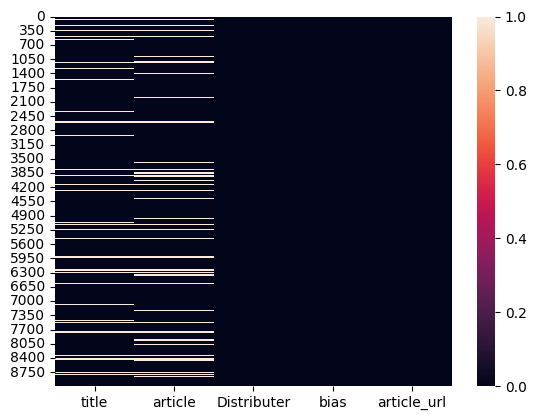

In [7]:
df['article'].replace('', np.nan, inplace=True)
df['title'].replace('', np.nan, inplace=True)
df['article'].replace(' ', np.nan, inplace=True)
sns.heatmap(df.isna())

In [8]:
df = df.dropna(subset=['article']).reset_index(drop=True)
df

,title,article,Distributer,bias,article_url
0,Traffic resumes on Ramban–Banihal highway; LMV...,Jammu:The National Highways Authority of India...,The Siasat Daily,Left,https://www.siasat.com/traffic-resumes-on-ramb...
1,"Ramban Cloudburst: 3 Dead, Several Missing As ...","Jammu, August 30: At least three people have l...",Latestly,Right,https://www.latestly.com/india/news/ramban-clo...
2,J-K monsoon disaster: Three killed as cloudbur...,At least three people were killed after a clou...,Financial Express,Right,https://www.financialexpress.com/india-news/th...
3,"Cloudburst hits J&K: 3 killed, 4 missing in Ra...",A cloudburst in Jammu and Kashmir's Ramban reg...,India Today,Right,https://www.indiatoday.in/india/video/jammu-an...
4,"11 dead in J-K as cloudburst hits Ramban, land...",Eleven people lost their lives in two separate...,Tribune India,Right,https://www.tribuneindia.com/news/j-k/3-dead-t...
...,...,...,...,...,...
8034,Plane overshoots runway touch down zone at Roa...,ROANOKE — No injuries were reported after a co...,The Virginian Pilot,Center,https://www.pilotonline.com/2025/09/25/roanoke...
8035,US Authorities Probe Flight Overshooting Runwa...,US authorities are investigating an incident w...,Bloomberg,Left,https://www.bloomberg.com/news/articles/2025-0...
8036,Life-saving runway tech saves dozens in Virgin...,A United flight from Dulles faced a close call...,Fox5 DC,Center,https://www.fox5dc.com/news/plane-overshot-lan...
8037,No injuries reported after incident at Roanoke...,Airport officials say multiple flights Thursda...,WSLS,Center,https://www.wsls.com/news/local/2025/09/25/off...


<Axes: >

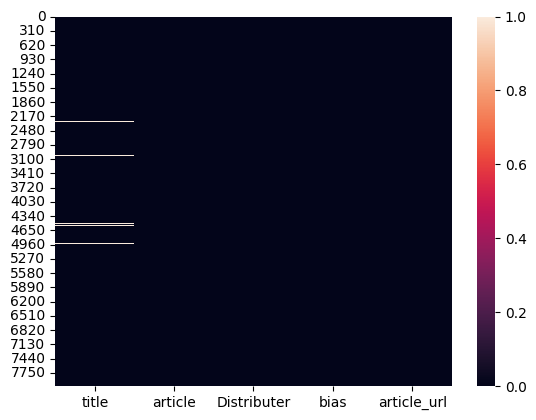

In [9]:
sns.heatmap(df.isna())

In [10]:
df['word_count'] = df['article'].str.split().str.len()
print(df[df.word_count>2000].shape)
print(df[df.word_count<120].shape)

(128, 6)
(1004, 6)


In [11]:
#droping all the article with specific lengths
df = df[(df.word_count >= 120) & (df.word_count <= 2000)].reset_index(drop=True)
df.shape

(6907, 6)

In [12]:
df.bias.value_counts()

bias
Left      2518
Center    2210
Right     2179
Name: count, dtype: int64

In [13]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(
    class_weight='balanced',
    classes=df['bias'].unique(),
    y=df['bias']
)
weights


array([0.91435001, 1.05660089, 1.04177979])

In [14]:
df2=df[['bias','article']]
df2.to_csv("final_data.csv", encoding='utf-8')